<a id="2"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">PREPARATION</span></b></h1>

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy import spatial
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure
import math
from itertools import combinations

In [2]:
df = pd.read_csv('finalData.csv')
df.head(10)

C:\Users\jayac\AppData\Local\Temp\ipykernel_32552\1119964897.py:1: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('finalData.csv')


id                      name                     substitute0  \
0    1  augmentin 625 duo tablet  Penciclav 500 mg/125 mg Tablet   
1    2       azithral 500 tablet         Zithrocare 500mg Tablet   
2    3          ascoril ls syrup                 Solvin LS Syrup   
3    4      allegra 120mg tablet                    Lcfex Tablet   
4    4      allegra 120mg tablet                    Lcfex Tablet   
5  706      allegra 120mg tablet                    Lcfex Tablet   
6  706      allegra 120mg tablet                    Lcfex Tablet   
7  756      allegra 120mg tablet                    Lcfex Tablet   
8  756      allegra 120mg tablet                    Lcfex Tablet   
9    5            avil 25 tablet              Eralet 25mg Tablet   

              substitute1              substitute2            substitute3  \
0  Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet     Fightox 625 Tablet   
1         Azax 500 Tablet          Zady 500 Tablet  Cazithro 500mg Tablet   
2       Ambrodil-LX Syrup        Zerotuss XP Syrup         Capex LS Syrup   
3     Etofex 120mg Tablet     Nexofex 120mg Tablet    Fexise 120mg Tablet   
4     Etofex 120mg Tablet     Nexofex 120mg Tablet    Fexise 120mg Tablet   
5     Etofex 120mg Tablet       F Din 120mg Tablet   Nexofex 120mg Tablet   
6     Etofex 120mg Tablet       F Din 120mg Tablet   Nexofex 120mg Tablet   
7     Etofex 120mg Tablet       F Din 120mg Tablet   Nexofex 120mg Tablet   
8     Etofex 120mg Tablet       F Din 120mg Tablet   Nexofex 120mg Tablet   
9                     NaN                      NaN                    NaN   

               substitute4 sideEffect0       sideEffect1     sideEffect2  ...  \
0  Novamox CV 625mg Tablet    Vomiting            Nausea        Diarrhea  ...   
1    Trulimax 500mg Tablet    Vomiting            Nausea  Abdominal pain  ...   
2          Broxum LS Syrup      Nausea          Vomiting        Diarrhea  ...   
3     Histafree 120 Tablet    Headache        Drowsiness       Dizziness  ...   
4     Histafree 120 Tablet    Headache        Drowsiness       Dizziness  ...   
5      Fexise 120mg Tablet    Headache        Drowsiness       Dizziness  ...   
6      Fexise 120mg Tablet    Headache        Drowsiness       Dizziness  ...   
7      Fexise 120mg Tablet    Headache        Drowsiness       Dizziness  ...   
8      Fexise 120mg Tablet    Headache        Drowsiness       Dizziness  ...   
9                      NaN  Sleepiness  Dryness in mouth             NaN  ...   

  Habit Forming Therapeutic Class                            Action Class  \
0            No   ANTI INFECTIVES                                     NaN   
1            No   ANTI INFECTIVES                              Macrolides   
2            No       RESPIRATORY                                     NaN   
3            No       RESPIRATORY  H1 Antihistaminics (second Generation)   
4            No       RESPIRATORY  H1 Antihistaminics (second Generation)   
5            No       RESPIRATORY  H1 Antihistaminics (second Generation)   
6            No       RESPIRATORY  H1 Antihistaminics (second Generation)   
7            No       RESPIRATORY  H1 Antihistaminics (second Generation)   
8            No       RESPIRATORY  H1 Antihistaminics (second Generation)   
9            No       RESPIRATORY   H1 Antihistaminics (First Generation)   

  price(₹) Is_discontinued                     manufacturer_name       type  \
0   223.42           False  Glaxo SmithKline Pharmaceuticals Ltd  allopathy   
1   132.36           False           Alembic Pharmaceuticals Ltd  allopathy   
2   118.00           False          Glenmark Pharmaceuticals Ltd  allopathy   
3   218.81           False                     Sanofi India  Ltd  allopathy   
4   150.00            True                     Sanofi India  Ltd  allopathy   
5   218.81           False                     Sanofi India  Ltd  allopathy   
6   150.00            True                     Sanofi India  Ltd  allopathy   
7   218.81           False         

<a id="3"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">DATA ANALYSIS</span></b></h1>

In [3]:
df.shape

(256725, 65)

<h1><b><span style="color: #6c584c; font-size: 16px">Data Shape insights:</span></b></h1>

- Rows: 253973
- Columns: 9
- Phew, huge dataset - Let's do this.

In [4]:
# Unique values
print('Unique Values per column:')
for i in df.columns:
    print(f'{i} → {df[i].nunique()}')

Unique Values per column:
id → 246687
name → 221414
substitute0 → 19319
substitute1 → 16275
substitute2 → 14271
substitute3 → 12759
substitute4 → 11676
sideEffect0 → 325
sideEffect1 → 333
sideEffect2 → 350
sideEffect3 → 362
sideEffect4 → 358
sideEffect5 → 324
sideEffect6 → 298
sideEffect7 → 274
sideEffect8 → 253
sideEffect9 → 231
sideEffect10 → 211
sideEffect11 → 181
sideEffect12 → 173
sideEffect13 → 144
sideEffect14 → 120
sideEffect15 → 94
sideEffect16 → 77
sideEffect17 → 65
sideEffect18 → 51
sideEffect19 → 41
sideEffect20 → 35
sideEffect21 → 29
sideEffect22 → 24
sideEffect23 → 17
sideEffect24 → 13
sideEffect25 → 10
sideEffect26 → 10
sideEffect27 → 9
sideEffect28 → 9
sideEffect29 → 8
sideEffect30 → 5
sideEffect31 → 5
sideEffect32 → 4
sideEffect33 → 3
sideEffect34 → 2
sideEffect35 → 1
sideEffect36 → 1
sideEffect37 → 1
sideEffect38 → 1
sideEffect39 → 1
sideEffect40 → 1
sideEffect41 → 1
use0 → 657
use1 → 334
use2 → 139
use3 → 74
use4 → 33
Chemical Class → 871
Habit Forming → 2
Therapeuti

In [5]:
# Missing data
print('Missing data per column')
df.isnull().sum()

Missing data per column


id                         0
name                       0
substitute0            10108
substitute1            15097
substitute2            18835
                       ...  
manufacturer_name          0
type                       0
pack_size_label            0
short_composition1         0
short_composition2    144455
Length: 65, dtype: int64

<h1><b><span style="color: #6c584c; font-size: 16px">Missing data insights</span></b></h1>

- 'short_composition2' seems to have a large amount of missing values, can we drop it?
- No we cannot, composition of medicines (primary/secondary) is of the highest importance for the problem at hand.
- A fix for this will be demonstrated down the notebook.

<a id="4"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">DATA CLEANING</span></b></h1>

In [6]:
# Dropping unncecessary columns

# 'type' column has only 1 value and will not have an effect on the final model
df=df.drop(columns=['type'])

# Discontinued medicines and the column must be dropped as the model needs to be frictionless
# 'id' can also be dropped
df = df[df.Is_discontinued==False]
df=df.drop(columns=['Is_discontinued','id'])

In [7]:
df.head()

name                     substitute0  \
0  augmentin 625 duo tablet  Penciclav 500 mg/125 mg Tablet   
1       azithral 500 tablet         Zithrocare 500mg Tablet   
2          ascoril ls syrup                 Solvin LS Syrup   
3      allegra 120mg tablet                    Lcfex Tablet   
5      allegra 120mg tablet                    Lcfex Tablet   

              substitute1              substitute2            substitute3  \
0  Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet     Fightox 625 Tablet   
1         Azax 500 Tablet          Zady 500 Tablet  Cazithro 500mg Tablet   
2       Ambrodil-LX Syrup        Zerotuss XP Syrup         Capex LS Syrup   
3     Etofex 120mg Tablet     Nexofex 120mg Tablet    Fexise 120mg Tablet   
5     Etofex 120mg Tablet       F Din 120mg Tablet   Nexofex 120mg Tablet   

               substitute4 sideEffect0 sideEffect1     sideEffect2  \
0  Novamox CV 625mg Tablet    Vomiting      Nausea        Diarrhea   
1    Trulimax 500mg Tablet    Vomiting      Nausea  Abdominal pain   
2          Broxum LS Syrup      Nausea    Vomiting        Diarrhea   
3     Histafree 120 Tablet    Headache  Drowsiness       Dizziness   
5      Fexise 120mg Tablet    Headache  Drowsiness       Dizziness   

     sideEffect3  ... use4              Chemical Class Habit Forming  \
0            NaN  ...  NaN                         NaN            No   
1       Diarrhea  ...  NaN                  Macrolides            No   
2  Upset stomach  ...  NaN                         NaN            No   
3         Nausea  ...  NaN  Diphenylmethane Derivative            No   
5         Nausea  ...  NaN  Diphenylmethane Derivative            No   

  Therapeutic Class                            Action Class price(₹)  \
0   ANTI INFECTIVES                                     NaN   223.42   
1   ANTI INFECTIVES                              Macrolides   132.36   
2       RESPIRATORY                                     NaN   118.00   
3       RESPIRATORY  H1 Antihistaminics (second Generation)   218.81   
5       RESPIRATORY  H1 Antihistaminics (second Generation)   218.81   

                      manufacturer_name         pack_size_label  \
0  Glaxo SmithKline Pharmaceuticals Ltd     strip of 10 tablets   
1           Alembic Pharmaceuticals Ltd      strip of 5 tablets   
2          Glenmark Pharmaceuticals Ltd  bottle of 100 ml Syrup   
3                     Sanofi India  Ltd     strip of 10 tablets   
5                     Sanofi India  Ltd     strip of 10 tablets   

      short_composition1          short_composition2  
0  Amoxycillin  (500mg)      Clavulanic Acid (125mg)  
1   Azithromycin (500mg)                         NaN  
2   Ambroxol (30mg/5ml)    Levosalbutamol (1mg/5ml)   
3   Fexofenadine (120mg)                         NaN  
5   Fexofenadine (120mg)                         NaN  

[5 rows x 62 columns]

In [8]:
# Exploring the 'pack_size_label' column
form=[]
count={}
for i in df.pack_size_label:
    words=i.split()
    x=words[-1].lower()
    if len(x)<=2:
        x=words[-2].lower()
    if x in form:
        count[x]+=1
    else:
        count[x]=1
        form.append(x)

sorted_count = dict(sorted(count.items(), key=lambda x:x[1], reverse=True))
print(sorted_count)

{'tablets': 129486, 'injection': 30513, 'tablet': 18619, 'syrup': 17156, 'capsules': 15402, 'suspension': 9187, 'cream': 5937, 'capsule': 5354, 'drop': 3761, 'solution': 1853, 'ointment': 1745, 'gel': 1713, 'drops': 1422, 'lotion': 1131, 'infusion': 1032, 'soap': 537, 'powder': 363, 'spray': 358, 'expectorant': 321, 'shampoo': 290, 'kit': 222, 'inhaler': 210, 'wash': 208, 'liquid': 160, 'injections': 144, 'granules': 140, 'respules': 123, 'suppositories': 74, 'gargle': 67, 'rotacaps': 52, 'sachet': 51, 'patches': 49, 'inhalation': 45, 'strips': 41, 'suppository': 35, 'paint': 32, 'strip': 27, 'respicaps': 26, 'syringe': 24, 'emulsion': 24, 'transcaps': 23, 'lozenges': 22, 'linctus': 21, 'paste': 19, 'pessaries': 19, 'combikit': 18, 'transhaler': 18, 'bottles': 17, 'transpules': 17, 'toothpaste': 16, 'patch': 14, 'gums': 14, 'suspensions': 13, 'scrub': 13, 'combipack': 9, 'solutions': 9, 'sachets': 9, 'jelly': 8, 'cartriges': 8, 'lacquer': 7, 'enema': 7, 'liniment': 7, 'syrups': 6, 'hus

In [9]:
# Fix: removing the plural issue (eg: tablet | tablets)
final_count=sorted_count.copy()
for key,value in sorted_count.items():
    test=(key+'s') in final_count
    if test:
        final_count[key]+=final_count[key+'s']
        del final_count[key+'s']
        form.remove(key+'s')
        
final_count = dict(sorted(final_count.items(), key=lambda x:x[1], reverse=True))
print(final_count)

{'tablet': 148105, 'injection': 30657, 'capsule': 20756, 'syrup': 17162, 'suspension': 9200, 'cream': 5942, 'drop': 5183, 'solution': 1862, 'ointment': 1745, 'gel': 1715, 'lotion': 1132, 'infusion': 1033, 'soap': 537, 'powder': 363, 'spray': 358, 'expectorant': 321, 'shampoo': 291, 'kit': 222, 'inhaler': 210, 'wash': 208, 'liquid': 160, 'granules': 140, 'respules': 123, 'suppositories': 74, 'strip': 68, 'gargle': 67, 'sachet': 60, 'rotacaps': 52, 'patches': 49, 'inhalation': 45, 'suppository': 35, 'paint': 32, 'respicaps': 26, 'emulsion': 25, 'syringe': 24, 'transcaps': 23, 'lozenges': 22, 'linctus': 21, 'paste': 19, 'pessaries': 19, 'combikit': 18, 'transhaler': 18, 'bottles': 17, 'transpules': 17, 'toothpaste': 16, 'gum': 16, 'patch': 14, 'scrub': 13, 'combipack': 9, 'jelly': 8, 'cartriges': 8, 'lacquer': 7, 'enema': 7, 'liniment': 7, 'husk': 6, 'tabcaps': 6, 'serum': 6, 'instacap': 5, 'bio-adhesive': 4, 'particles': 4, 'caplets': 4, 'foam': 4, 'redicaps': 4, 'nexcaps': 4, 'condition

<h1><b><span style="color: #6c584c; font-size: 16px">Creating new columns</span></b></h1>

- <b>type</b>: type of medicine (tablet, syrup, etc.)
- <b>primary_comp</b>: text extracted from from 'short_composition1' 
- <b>entire_comp</b>: 'primary_comp' + text extracted from from 'short_composition2'
- <b>value</b>: compostion metrics extracted from 'short_composition1' (Eg: 500mg)
- <b>entire_value</b>: value + compostion metrics extracted from 'short_composition1' (Eg: 125mg) (Note: This is text data)

In [10]:
def getType(row):  
    for type in form:
        if type in row['pack_size_label'].lower():
            return type  
def getComp(row):  
    return row['short_composition1'].split('(')[0].lower().rstrip()

def getValue(row):  
    return row['short_composition1'].split('(')[1].lower().rstrip().rstrip(')')


df['type'] = df.apply(lambda row: getType(row), axis=1)
df['primary_comp'] = df.apply(lambda row: getComp(row), axis=1)
df['entire_comp'] =  df['primary_comp'] + ' ' + np.where(df['short_composition2'].isna(), '',
                                                         df['short_composition2'].astype(str).apply(lambda x: x.split('(')[0].lower().rstrip()))
df['value'] = df.apply(lambda row: getValue(row), axis=1)
df['entire_value'] =  df['value'] + ' ' + np.where(df['short_composition2'].isna(), '',
                                                   df['short_composition2'].astype(str).apply(lambda x: x.split('(')[1].lower().rstrip().rstrip(')') if len(x.split('(')) > 1 else ''))

In [11]:
# Drop redundant columns
dataset = df.drop(columns=['pack_size_label','short_composition1','short_composition2'])

In [12]:
dataset.head(10)

name                     substitute0  \
0   augmentin 625 duo tablet  Penciclav 500 mg/125 mg Tablet   
1        azithral 500 tablet         Zithrocare 500mg Tablet   
2           ascoril ls syrup                 Solvin LS Syrup   
3       allegra 120mg tablet                    Lcfex Tablet   
5       allegra 120mg tablet                    Lcfex Tablet   
7       allegra 120mg tablet                    Lcfex Tablet   
9             avil 25 tablet              Eralet 25mg Tablet   
10          allegra-m tablet              Emlukast-FX Tablet   
11      amoxyclav 625 tablet  Penciclav 500 mg/125 mg Tablet   
12           azee 500 tablet         Zithrocare 500mg Tablet   

               substitute1              substitute2            substitute3  \
0   Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet     Fightox 625 Tablet   
1          Azax 500 Tablet          Zady 500 Tablet  Cazithro 500mg Tablet   
2        Ambrodil-LX Syrup        Zerotuss XP Syrup         Capex LS Syrup   
3      Etofex 120mg Tablet     Nexofex 120mg Tablet    Fexise 120mg Tablet   
5      Etofex 120mg Tablet       F Din 120mg Tablet   Nexofex 120mg Tablet   
7      Etofex 120mg Tablet       F Din 120mg Tablet   Nexofex 120mg Tablet   
9                      NaN                      NaN                    NaN   
10       LCFEX-Mont Tablet  Fixar 10mg/120mg Tablet     Histakind-M Tablet   
11  Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet     Fightox 625 Tablet   
12         Azax 500 Tablet          Zady 500 Tablet  Cazithro 500mg Tablet   

                substitute4 sideEffect0       sideEffect1     sideEffect2  \
0   Novamox CV 625mg Tablet    Vomiting            Nausea        Diarrhea   
1     Trulimax 500mg Tablet    Vomiting            Nausea  Abdominal pain   
2           Broxum LS Syrup      Nausea          Vomiting        Diarrhea   
3      Histafree 120 Tablet    Headache        Drowsiness       Dizziness   
5       Fexise 120mg Tablet    Headache        Drowsiness       Dizziness   
7       Fexise 120mg Tablet    Headache        Drowsiness       Dizziness   
9                       NaN  Sleepiness  Dryness in mouth             NaN   
10       Histafree-M Tablet      Nausea          Diarrhea        Vomiting   
11  Novamox CV 625mg Tablet    Vomiting            Nausea        Diarrhea   
12    Trulimax 500mg Tablet    Vomiting            Nausea  Abdominal pain   

      sideEffect3  ... Habit Forming Therapeutic Class  \
0             NaN  ...            No   ANTI INFECTIVES   
1        Diarrhea  ...            No   ANTI INFECTIVES   
2   Upset stomach  ...            No       RESPIRATORY   
3          Nausea  ...            No       RESPIRATORY   
5          Nausea  ...            No       RESPIRATORY   
7          Nausea  ...            No       RESPIRATORY   
9             NaN  ...            No       RESPIRATORY   
10      Skin rash  ...            No       RESPIRATORY   
11            NaN  ...            No   ANTI INFECTIVES   
12       Diarrhea  ...            No   ANTI INFECTIVES   

                              Action Class price(₹)  \
0                                      NaN   223.42   
1                               Macrolides   132.36   
2                                      NaN   118.00   
3   H1 Antihistaminics (second Generation)   218.81   
5   H1 Antihistaminics (second Generation)   218.81   
7   H1 Antihistaminics (second Generation)   218.81   
9    H1 Antihistaminics (First Generation)    10.96   
10                                     NaN   241.48   
11                                     NaN   223.27   
12                              Macrolides   132.38   

                       manufacturer_name    type  primary_comp  \
0   Glaxo SmithKline Pharmaceuticals Ltd  tablet   amoxycillin   
1            Alembic Pharmaceuticals Ltd  tablet  azithromycin   
2           Glenmark Pharmaceuticals Ltd   syrup      ambroxol   
3                      Sanofi India  Ltd  tablet  fexofenadine   
5                      Sanofi India  

<b>Et voilà! our data looks much better</b>

<a id="5"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">DATA VISUALIZATION</span></b></h1>

# Initialize the initial column to be displayed
initial_column = 'manufacturer_name'
counts = dataset[initial_column].value_counts()[:11]

# Create a bar chart using Plotly
color_start = 'rgb(76, 75, 22)'
color_end = 'rgb(247, 241, 229)'
fig = px.bar(dataset, x=counts.index, y=counts.values,color=counts.values, color_continuous_scale='sunset')

fig.update_layout(
    title='Distribution of Features',
    xaxis_title='Unique Values (Top 10)',
    yaxis_title='Count',
    plot_bgcolor='white'  
)
fig.update_layout(barmode='group')
columns = ['manufacturer_name','type', 'primary_comp','entire_comp', 'value','entire_value' ]
buttons = []
for column in columns:
    button = dict(
        label=column,
        method='update',
        args=[{'y': [dataset[column].value_counts()[:11].values], 'x':[dataset[column].value_counts()[:11].index], 'title':f'Counts of Unique Values in {column}' }],
        args2=[{'name': column}],
    )
    buttons.append(button)

# Add buttons to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ]
)

fig.show()

<a id="6"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">WORD EMBEDDINGS</span></b></h1>

<h1><b><span style="color: #6c584c; font-size: 16px">Why word embeddings?</span></b></h1>

- Machine Learning models cannot process text as a string and will need to be converted into number format.
- Our data has a great deal of text, word embedding will play an instrumental role.
- To read more on this, [click here](https://machinelearningmastery.com/what-are-word-embeddings/)
- I have used the 'Word2Vec' model from the 'gensim' library.
- A new model is created for each and every text column and embeddings for each value of that column are generated and stored (to save time for calculation).

In [13]:
dataset.drop_duplicates(subset=['name'],inplace=True)

In [25]:
dataset['full_composition'] = dataset['entire_comp'] + " " + dataset['entire_value'] 

In [29]:
# Function to generate word embeddings for a column
def generate_word_embeddings(column):
    unique_values = dataset[column].unique()
    sentences = [[value] for value in unique_values]
    model = Word2Vec(sentences, min_count=1, vector_size=100)
    return model

# Define the text columns for which word embeddings need to be generated
text_columns = ['manufacturer_name', 'type', 'primary_comp','entire_comp', 'value','entire_value','full_composition']

# Dictionary to store the models
word_embedding_models = {}

# Generate and store word embeddings for each text column
for column in text_columns:
    model = generate_word_embeddings(column)
    word_embedding_models[column] = model

# Apply word embeddings to correct columns and create new columns for embeddings
for column, model in tqdm(word_embedding_models.items(), desc="embeddings"):
    dataset[column + '_embeddings'] = dataset[column].apply(lambda x: model.wv[x].reshape(1, -1) if x in model.wv else [])

embeddings: 100%|████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.75it/s]


In [30]:
dataset.head()

name                     substitute0  \
0  augmentin 625 duo tablet  Penciclav 500 mg/125 mg Tablet   
1       azithral 500 tablet         Zithrocare 500mg Tablet   
2          ascoril ls syrup                 Solvin LS Syrup   
3      allegra 120mg tablet                    Lcfex Tablet   
9            avil 25 tablet              Eralet 25mg Tablet   

              substitute1              substitute2            substitute3  \
0  Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet     Fightox 625 Tablet   
1         Azax 500 Tablet          Zady 500 Tablet  Cazithro 500mg Tablet   
2       Ambrodil-LX Syrup        Zerotuss XP Syrup         Capex LS Syrup   
3     Etofex 120mg Tablet     Nexofex 120mg Tablet    Fexise 120mg Tablet   
9                     NaN                      NaN                    NaN   

               substitute4 sideEffect0       sideEffect1     sideEffect2  \
0  Novamox CV 625mg Tablet    Vomiting            Nausea        Diarrhea   
1    Trulimax 500mg Tablet    Vomiting            Nausea  Abdominal pain   
2          Broxum LS Syrup      Nausea          Vomiting        Diarrhea   
3     Histafree 120 Tablet    Headache        Drowsiness       Dizziness   
9                      NaN  Sleepiness  Dryness in mouth             NaN   

     sideEffect3  ...     value      entire_value  \
0            NaN  ...     500mg       500mg 125mg   
1       Diarrhea  ...     500mg            500mg    
2  Upset stomach  ...  30mg/5ml  30mg/5ml 1mg/5ml   
3         Nausea  ...     120mg            120mg    
9            NaN  ...      25mg             25mg    

                        manufacturer_name_embeddings  \
0  [[0.004821432, -0.005568389, 0.0017709744, -0....   
1  [[6.381273e-05, -0.00014566541, -0.0036244954,...   
2  [[0.008133742, 0.000496583, 0.008260438, 0.006...   
3  [[0.005792098, -0.0017245996, -0.0057441103, -...   
9  [[0.005792098, -0.0017245996, -0.0057441103, -...   

                                     type_embeddings  \
0  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
1  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
2  [[-0.0049735666, -0.0012833046, 0.0032806373, ...   
3  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
9  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   

                             primary_comp_embeddings  \
0  [[-0.0071832025, -0.006518078, 0.0005500734, 0...   
1  [[0.007047075, -0.0027565705, -0.008488886, -0...   
2  [[-0.0030545057, 0.0075470423, 0.006751379, -0...   
3  [[-0.0047372817, 0.0011313355, -0.008183492, 0...   
9  [[0.0053921067, -0.00040366172, -0.002505605, ...   

                              entire_comp_embeddings  \
0  [[0.003674388, 0.005575422, -0.009451213, -0.0...   
1  [[-0.006120726, -0.007762488, 0.007975724, -0....   
2  [[-0.005395583, 0.005303172, 0.005606996, 0.00...   
3  [[-0.0056813573, -0.0045362697, 0.003602867, 0...   
9  [[-0.008139694, -0.0055316235, -0.0036182546, ...   

                                    value_embeddings  \
0  [[0.005966625, 0.002267406, 0.008789628, 0.009...   
1  [[0.005966625, 0.002267406, 0.008789628, 0.009...   
2  [[0.0015190399, 0.004017153, 0.0007946229, -0....   
3  [[-0.003042177, 0.0071285223, 0.008035216, 0.0...   
9  [[-0.007095563, -0.0056908643, -0.008470836, -...   

                             entire_value_embeddings  \
0  [[0.008831693, -0.008356099, 0.005721015, 0.00...   
1  [[0.009204239, 0.007210282, 0.009846059, 0.009...   
2  [[0.0024174738, 0.0016966164, 0.006300769, 0.0...   
3  [[-0.009722254, 0.0020302283, 0.007372825, 0.0...   
9  [[-0.0091337655, 0.00991012, -0.00093003036, 0...   

                            full_composition  \
0  amoxycillin   clavulanic acid 500mg 125mg   
1                       azithromycin  500mg    
2  ambroxol  levosalbutamol 30mg/5ml 1mg/5ml   
3                       fexofenadine  120mg    
9                         pheniramine  25mg    

                         full_composition_embeddings  
0  [[0.0029645276, 0.0010960721, 0.0043

<b>Yay! We got the embeddings but nothing makes sense. Let's solve that.</b>

<a id="7"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">WEIGHTED FEATURES</span></b></h1>

<h1><b><span style="color: #6c584c; font-size: 16px">Why weighted features?</span></b></h1>

- We do not have user data - we need a method to filter out medicines and recommend the most similar medicines.
- A few features are more important than the others, how do we represent that?
- Weighted features concept does exactly that - assign a weight between 0 - 1 (for scale) to all the features (or columns).
- This weightage gives an edge to the higher priority features in the final similarity score.

In [16]:
# These weights can be adjusted based on preference
weightage = {
    'price(₹)': 0.5,
    'manufacturer_name_embeddings': 0.3,
    'type_embeddings': 1.0,
    'primary_comp_embeddings': 0.8,
    'entire_comp_embeddings':1.0,
    'value_embeddings': 0.8,
    'entire_value_embeddings': 1.0
}

In [17]:
dataset['type_embeddings'][0]

array([[ 0.00422277,  0.00017857,  0.00478468,  0.00295762,  0.00143602,
        -0.00688735, -0.00825709, -0.0058633 , -0.00717207,  0.00956167,
        -0.00876166, -0.00928602,  0.00292863,  0.00818476,  0.0070194 ,
        -0.00465525,  0.00652894,  0.00061585, -0.00396335, -0.00528841,
        -0.00188344, -0.008198  ,  0.00096084,  0.00728405, -0.00320674,
         0.00263428,  0.00460407,  0.00753315, -0.00644108,  0.00262586,
        -0.001779  ,  0.00439026, -0.00254997, -0.00764301,  0.00098977,
        -0.00983818,  0.0085363 , -0.00825434, -0.00064873,  0.00701605,
        -0.00571751, -0.00933843, -0.00416391, -0.00805344,  0.00649992,
        -0.0079225 , -0.00474965, -0.00869803,  0.00976129, -0.00337319,
        -0.00583406,  0.00195608,  0.00043455,  0.00833165, -0.00221004,
        -0.00659688, -0.00541753, -0.0090106 ,  0.00962986,  0.00929314,
         0.00249093, -0.00720521, -0.00208861,  0.00476714, -0.0057503 ,
         0.00857746,  0.00689601, -0.001797  , -0.0

<a id="8"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">GENERATING RECOMMENDATIONS</span></b></h1>

<h1><b><span style="color: #6c584c; font-size: 16px">Using cosine similarity</span></b></h1>

- One Medicine from the data is chosen to check for similarity (say, Medicine A)
- Numeric features are directly compared for similarity.
- Meanwhile, Word embeddings of text features are utilised for this purpose.
- A final similarity score is generated after multiplying the feature weightage.
- Higher the similarity score, higher it ranks on the recommender scale.

In [18]:
# Calculate similarity scores for 'price' column using cosine similarity
def calculate_price_similarity(price1, price2):
    price1 = np.array(price1).reshape(1, -1)
    price2 = np.array(price2).reshape(1, -1)
    similarity = cosine_similarity(price1, price2)
    return similarity[0][0]

def calculate_text_similarity(value1, value2):
    similarity = cosine_similarity(value1, value2)
    return similarity[0][0]

# Calculate weighted similarity between two medicines
def calculate_weighted_similarity(medicine1, medicine2):
    similarity_scores = []
    for column, weight in weightage.items():
        if column == 'price(₹)':
            similarity = calculate_price_similarity(medicine1[column].values[0], medicine2[column])
        else:
            similarity = calculate_text_similarity(medicine1[column].values[0], medicine2[column])
        similarity_scores.append(similarity * weight)
    weighted_similarity = sum(similarity_scores)
    return weighted_similarity

In [31]:
main_data = dataset[['type_embeddings','primary_comp_embeddings','entire_comp_embeddings','value_embeddings','entire_value_embeddings','full_composition_embeddings']]

In [32]:
main_data.head()

type_embeddings  \
0  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
1  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
2  [[-0.0049735666, -0.0012833046, 0.0032806373, ...   
3  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
9  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   

                             primary_comp_embeddings  \
0  [[-0.0071832025, -0.006518078, 0.0005500734, 0...   
1  [[0.007047075, -0.0027565705, -0.008488886, -0...   
2  [[-0.0030545057, 0.0075470423, 0.006751379, -0...   
3  [[-0.0047372817, 0.0011313355, -0.008183492, 0...   
9  [[0.0053921067, -0.00040366172, -0.002505605, ...   

                              entire_comp_embeddings  \
0  [[0.003674388, 0.005575422, -0.009451213, -0.0...   
1  [[-0.006120726, -0.007762488, 0.007975724, -0....   
2  [[-0.005395583, 0.005303172, 0.005606996, 0.00...   
3  [[-0.0056813573, -0.0045362697, 0.003602867, 0...   
9  [[-0.008139694, -0.0055316235, -0.0036182546, ...   

                                    value_embeddings  \
0  [[0.005966625, 0.002267406, 0.008789628, 0.009...   
1  [[0.005966625, 0.002267406, 0.008789628, 0.009...   
2  [[0.0015190399, 0.004017153, 0.0007946229, -0....   
3  [[-0.003042177, 0.0071285223, 0.008035216, 0.0...   
9  [[-0.007095563, -0.0056908643, -0.008470836, -...   

                             entire_value_embeddings  \
0  [[0.008831693, -0.008356099, 0.005721015, 0.00...   
1  [[0.009204239, 0.007210282, 0.009846059, 0.009...   
2  [[0.0024174738, 0.0016966164, 0.006300769, 0.0...   
3  [[-0.009722254, 0.0020302283, 0.007372825, 0.0...   
9  [[-0.0091337655, 0.00991012, -0.00093003036, 0...   

                         full_composition_embeddings  
0  [[0.0029645276, 0.0010960721, 0.0043047536, 0....  
1  [[-0.009020498, -0.003227241, -0.006497381, 0....  
2  [[0.007042612, -0.0040671565, 0.0056160106, 0....  
3  [[0.0034673153, -0.003095876, 0.009104681, 0.0...  
9  [[-0.005172083, 0.0081762085, 0.008243307, 0.0...

In [33]:
main_data = main_data.applymap(lambda x: x.flatten())

In [47]:
def convert_to_array(data):
    embedding_arr = []
    for x in data:
        embedding_arr.append(x)
    return embedding_arr

In [79]:
embedding_Sample1 = convert_to_array(main_data['entire_comp_embeddings'].sample(100000))
embedding_Sample2 = convert_to_array(main_data['entire_comp_embeddings'].sample(40000))
embedding_Sample3 = convert_to_array(main_data['entire_comp_embeddings'].sample(40000))
embedding_Sample4 = convert_to_array(main_data['entire_comp_embeddings'].sample(40000))
embedding_Sample5 = convert_to_array(main_data['entire_comp_embeddings'].sample(40000))
embedding_Sample6 = convert_to_array(main_data['entire_comp_embeddings'].sample(40000))
full_sample = convert_to_array(main_data['entire_comp_embeddings'])

In [49]:
sent1 = main_data['full_composition_embeddings'][0]
sent2 = main_data['full_composition_embeddings'][2]

sim = 1-spatial.distance.cosine(sent1,sent2)
sim

0.18283817172050476

In [50]:
embedding_Sample1

[array([ 4.6555926e-03, -4.7722529e-03,  1.6942084e-03, -4.8385109e-03,
         4.1035892e-04, -3.2832408e-03,  8.9285811e-03, -3.3817589e-03,
        -5.0543700e-03, -6.9574248e-03, -3.3743072e-03,  1.5651119e-03,
         8.9930072e-03,  7.8035998e-03, -2.5151933e-03, -8.7518683e-03,
         3.3025206e-03,  6.5279626e-03,  9.0191094e-03,  5.5779098e-03,
        -4.6498845e-03,  6.9639492e-03, -3.2154154e-03,  9.1832364e-03,
        -4.0033902e-03, -4.9519418e-03,  6.1948369e-03, -6.6772867e-03,
         1.2258803e-03,  8.0571687e-03,  6.8619847e-04,  1.7530811e-03,
        -8.9487555e-03, -4.1339193e-03, -9.0263011e-03, -3.6426066e-04,
        -7.8792573e-04,  7.1627023e-03,  1.1532939e-03, -6.0921991e-03,
         5.1225913e-03,  9.0529248e-03,  1.6275585e-03, -7.1210135e-03,
        -7.9828380e-03,  5.6719696e-03, -5.5524004e-03,  3.9972733e-03,
        -2.6509105e-03,  7.9135709e-03, -8.8880993e-03, -3.0816614e-03,
        -6.0288324e-03, -4.9401377e-03,  2.9027604e-03, -8.82341

In [41]:
int(math.sqrt(len(main_data)))

463

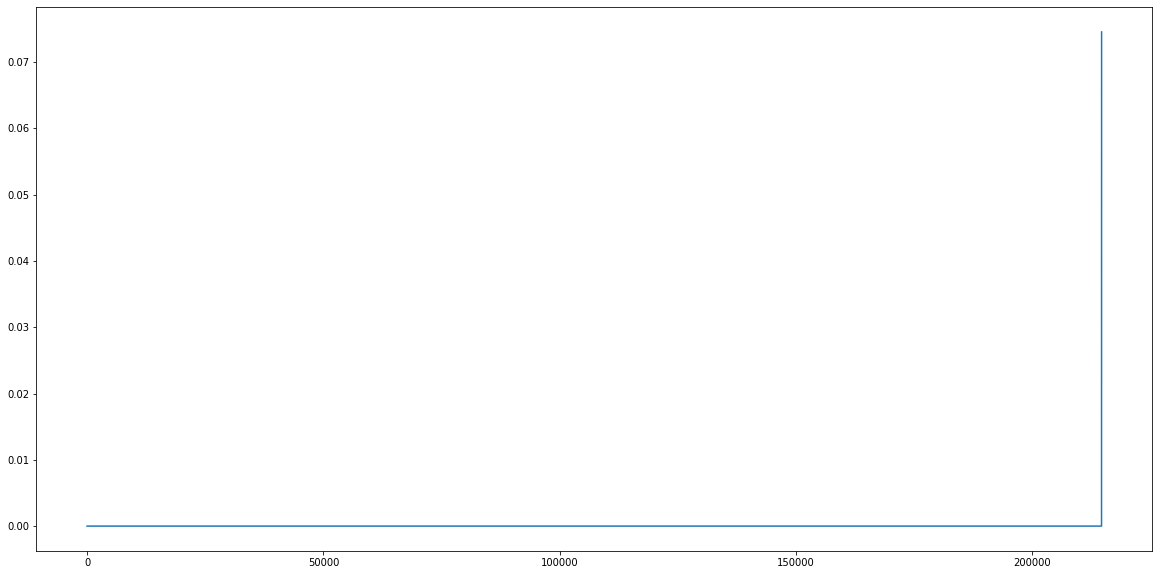

In [39]:
# nearest_neighbors = NearestNeighbors(n_neighbors=463) #sqrt of number of samples
# nearest_neighbors.fit(type_embedding_arr)
# distances, indices = nearest_neighbors.kneighbors(type_embedding_arr)
# distances = np.sort(distances, axis=0)[:, 1]
# #print(distances)
# plt.figure(figsize=(20,10))
# plt.plot(distances)
# plt.show()

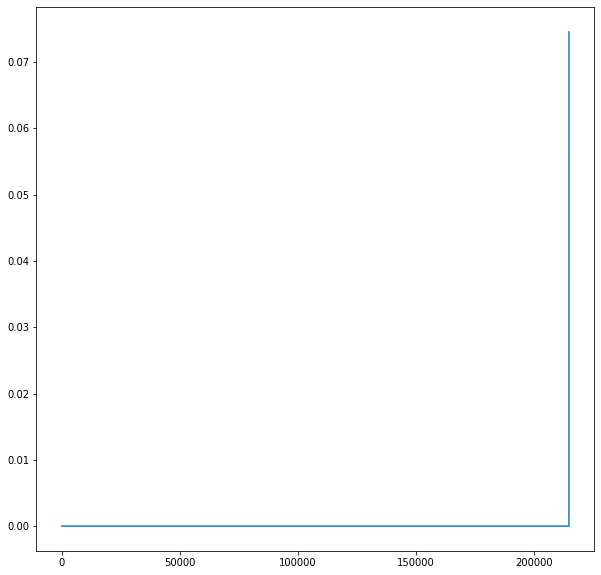

In [46]:
#print(distances)
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [42]:
clustering = DBSCAN(eps = 0.04, min_samples = 626, metric="cosine")

In [80]:
predictions = clustering.fit_predict(full_sample)

In [81]:
predictions

array([  0,   1,   2, ...,   6,   1, 378], dtype=int64)

In [100]:
silhoutte_score_avg = silhouette_score(full_sample,predictions,metric='cosine')

In [101]:
silhoutte_score_avg

0.9847674

In [110]:
calinski_harabasz_avg = calinski_harabasz_score(full_sample, predictions)

In [107]:
calinski_harabasz_avg

10676.417679437212

In [112]:
dataset['cluster'] = clustering.labels_

In [136]:
dataset[dataset['cluster'] == 0]

name                       substitute0  \
0            augmentin 625 duo tablet    Penciclav 500 mg/125 mg Tablet   
11               amoxyclav 625 tablet    Penciclav 500 mg/125 mg Tablet   
21      augmentin duo oral suspension          Goldclav Oral Suspension   
72           augmentin dds suspension        Bactoclav DS 457 Dry Syrup   
135         augmentin 1000 duo tablet            Moxikind-CV 1gm Tablet   
...                               ...                               ...   
256675           zitomox-cv dry syrup         Ibimox BD Oral Suspension   
256677   zooclav 250mg/50mg injection    Verclav 250 mg/50 mg Injection   
256679     zocmoxy 500mg/125mg tablet            Moxikind-CV 625 Tablet   
256696            zidmox cv dry syrup  Mokcan CV 200mg/28.5mg Dry Syrup   
256701   ziomox cv 500mg/125mg tablet            Moxikind-CV 625 Tablet   

                           substitute1                        substitute2  \
0               Moxikind-CV 625 Tablet            Moxiforce-CV 625 Tablet   
11              Moxikind-CV 625 Tablet            Moxiforce-CV 625 Tablet   
21                  Moxiclip Dry Syrup          Tervis DS Oral Suspension   
72                Extclav-DS Dry Syrup          Clavio-DS Oral Suspension   
135              Acuclav 1000mg Tablet     Mega-CV Duo 875mg/125mg Tablet   
...                                ...                                ...   
256675              Aediclav Dry Syrup    Nexximox-CV Duo Oral Suspension   
256677  Augclav 250 mg/50 mg Injection  Penom Clav 250 mg/50 mg Injection   
256679              Acuclav 625 Tablet            Moxiforce-CV 625 Tablet   
256696        Clavmentin Duo Dry Syrup  Xtraclav 200 mg/28.5 mg Dry Syrup   
256701              Acuclav 625 Tablet            Moxiforce-CV 625 Tablet   

                           substitute3                        substitute4  \
0                   Fightox 625 Tablet            Novamox CV 625mg Tablet   
11                  Fightox 625 Tablet            Novamox CV 625mg Tablet   
21                  Bestomax Dry Syrup              Amoxyril-CV Dry Syrup   
72           Medgud-CV Forte Dry Syrup              Clomaxin-DS Dry Syrup   
135     Bactoclav 875 mg/125 mg Tablet       Lmx Forte 875mg/125mg Tablet   
...                                ...                                ...   
256675          Amox C Oral Suspension          Clavpam-D 228.5 Dry Syrup   
256677   PD Mox C 250mg/50mg Injection   Clavactum 250 mg/50 mg Injection   
256679              Fightox 625 Tablet                  Advent 625 Tablet   
256696                Mpx-CV Dry Syrup  Clavituf 200 mg/28.5 mg Dry Syrup   
256701              Fightox 625 Tablet                  Advent 625 Tablet   

       sideEffect0 sideEffect1     sideEffect2 sideEffect3  ...  \
0         Vomiting      Nausea        Diarrhea         NaN  ...   
11        Vomiting      Nausea        Diarrhea         NaN  ...   
21          Nausea    Vomiting  Abdominal pain    Diarrhea  ...   
72          Nausea    Vomiting  Abdominal pain    Diarrhea  ...   
135       Vomiting      Nausea        Diarrhea         NaN  ...   
...            ...         ...             ...         ...  ...   
256675      Nausea    Vomiting  Abdominal pain    Diarrhea  ...   
256677    Vomiting      Nausea        Diarrhea         NaN  ...   
256679    Vomiting      Nausea        Diarrhea         NaN  ...   
256696      Nausea    Vomiting  Abdominal pain    Diarrhea  ...   
256701    Vomiting      Nausea        Diarrhea         NaN  ...   

                entire_value  \
0                500mg 125mg   
11               500mg 125mg   
21              200mg 28.5mg   
72        400mg/5ml 57mg/5ml   
135              875mg 125mg   
...                      ...   
256675  200mg/5ml 28.5mg/5ml   
256677            250mg 50mg   
256679           500mg 125mg   
256696          200mg 28.5mg   
256701           500mg 125mg   

                             manufacturer_name_embeddings  \
0       [[0.004821432, -0.00556

In [131]:
plot_df = dataset[['name','cluster']]

In [142]:
encoder = LabelEncoder()
plot_df['name'] = encoder.fit_transform(plot_df['name'])

C:\Users\jayac\AppData\Local\Temp\ipykernel_32552\433437958.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
plot_df.head()

name  cluster
0  19972        0
1  23478        1
2  17465        2
3   8848        3
9  20650        4

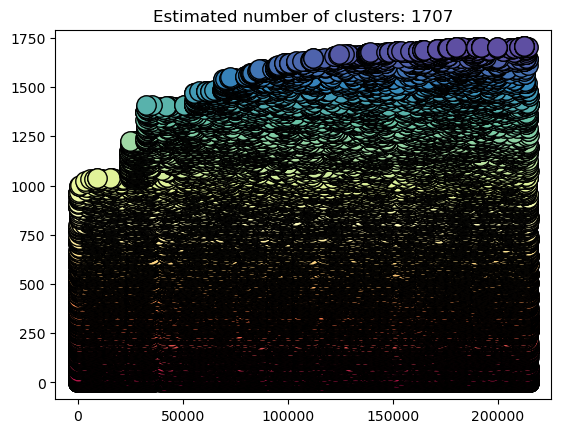

In [156]:
n_clusters_ = len(set(predictions)) - (1 if -1 in predictions else 0)
unique_labels = set(predictions)
core_samples_mask = np.zeros_like(predictions, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        continue

    class_member_mask = predictions == k

    xy = plot_df.loc[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = plot_df.loc[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

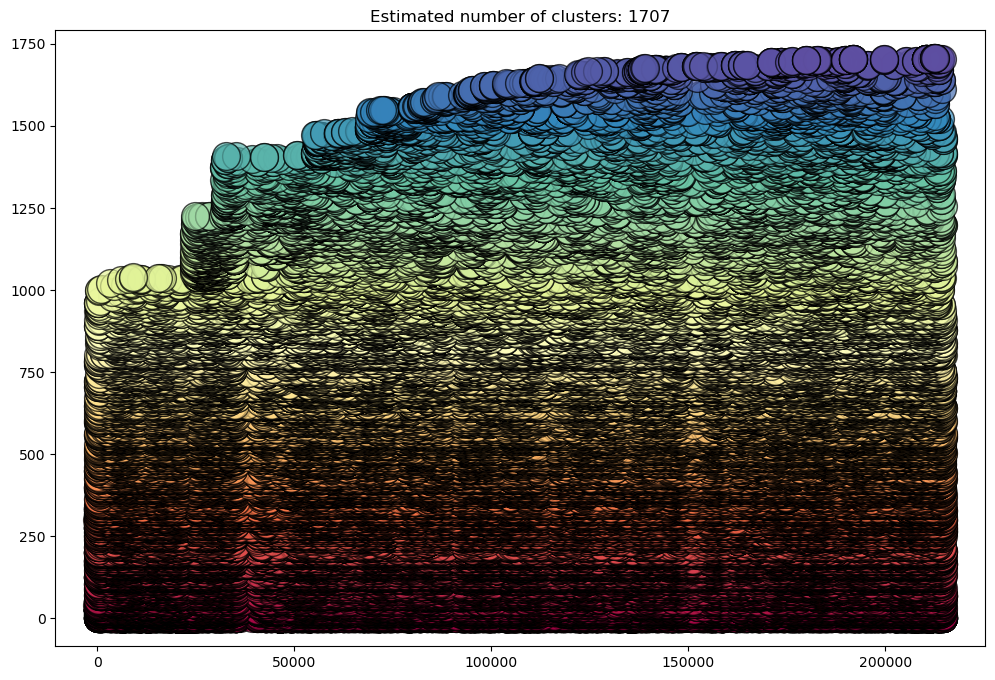

In [157]:
# ... (your existing code)

# Adjust the size of the plot and markers
plt.figure(figsize=(12, 8))

# Adjust alpha for transparency
for k, col in zip(unique_labels, colors):
    if k == -1:
        continue

    class_member_mask = predictions == k

    xy = plot_df.loc[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=20,  # Increase marker size
        alpha=0.7,  # Adjust alpha for transparency
    )

    xy = plot_df.loc[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,  # Increase marker size
        alpha=0.5,  # Adjust alpha for transparency
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


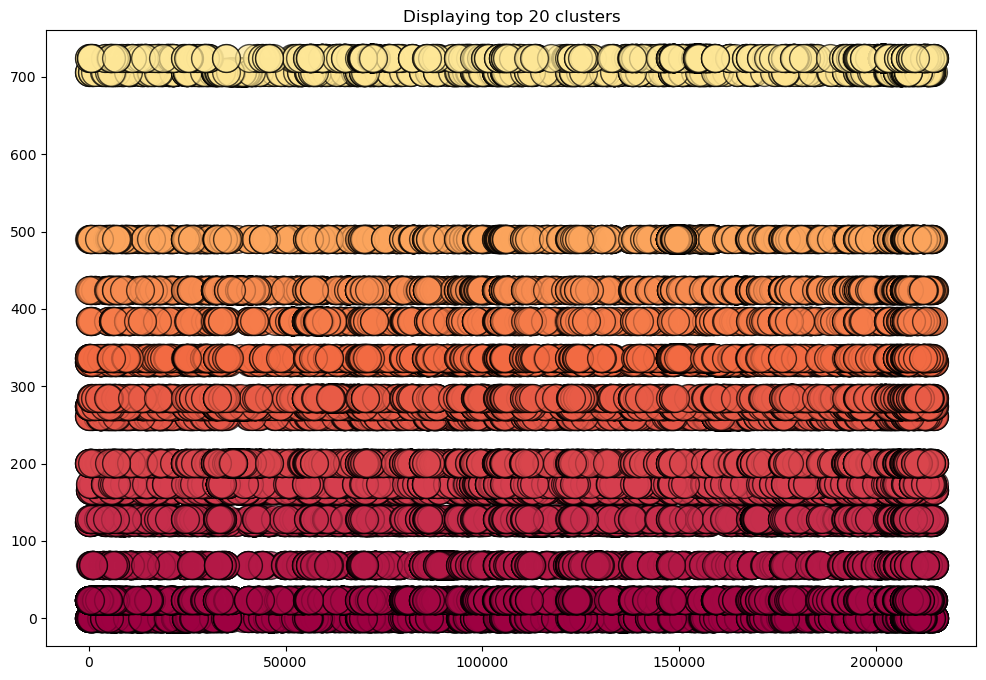

In [158]:
# ... (your existing code)

# Count the number of samples in each cluster
cluster_sizes = [(k, np.sum(predictions == k)) for k in unique_labels]

# Sort clusters by size in descending order
cluster_sizes.sort(key=lambda x: x[1], reverse=True)

# Display only the top 20 clusters
top_clusters = [k for k, _ in cluster_sizes[:20]]

# Adjust the size of the plot and markers
plt.figure(figsize=(12, 8))

# Adjust alpha for transparency
for k, col in zip(unique_labels, colors):
    if k == -1 or k not in top_clusters:
        continue

    class_member_mask = predictions == k

    xy = plot_df.loc[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=20,  # Increase marker size
        alpha=0.7,  # Adjust alpha for transparency
    )

    xy = plot_df.loc[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,  # Increase marker size
        alpha=0.5,  # Adjust alpha for transparency
    )

plt.title(f"Displaying top 20 clusters")
plt.show()


In [177]:
dataset[predictions == 20].sample(10)

name               substitute0  \
134906    lactone 100mg tablet  SPILACTONE 100 MG TABLET   
60720   cglactone 100mg tablet      Lactone 100mg Tablet   
216186        spirix 50 tablet    Spilactone 50mg Tablet   
216871      spironot 25 tablet      Aldobloc 25mg Tablet   
5530      aldotone 50mg tablet    Spilactone 50mg Tablet   
44568    cglactone 25mg tablet      Aldobloc 25mg Tablet   
216213     silectone 25 tablet      Aldobloc 25mg Tablet   
7663        aldace 25mg tablet      Aldobloc 25mg Tablet   
216807     silectone 50 tablet    Spilactone 50mg Tablet   
147        aldactone 50 tablet    Spilactone 50mg Tablet   

                     substitute1            substitute2  \
134906      Silectone 100 Tablet     Edeflow 100 Tablet   
60720   SPILACTONE 100 MG TABLET   Silectone 100 Tablet   
216186     Spirolact 50mg Tablet      Edeflow 50 Tablet   
216871        Spirix 25mg Tablet   Spiromax 25mg Tablet   
5530            Spirix 50 Tablet  Spirolact 50mg Tablet   
44568         Spirix 25mg Tablet   Spiromax 25mg Tablet   
216213        Spirix 25mg Tablet   Spiromax 25mg Tablet   
7663          Spirix 25mg Tablet   Spiromax 25mg Tablet   
216807          Spirix 50 Tablet  Spirolact 50mg Tablet   
147             Spirix 50 Tablet  Spirolact 50mg Tablet   

                   substitute3           substitute4 sideEffect0 sideEffect1  \
134906  Cglactone 100mg Tablet  Aldactone 100 Tablet      Nausea    Vomiting   
60720       Edeflow 100 Tablet  Aldactone 100 Tablet      Nausea    Vomiting   
216186    Aldotone 50mg Tablet   Silectone 50 Tablet      Nausea    Vomiting   
216871   Spirolact 25mg Tablet   Silectone 25 Tablet      Nausea    Vomiting   
5530         Edeflow 50 Tablet   Silectone 50 Tablet      Nausea    Vomiting   
44568    Spirolact 25mg Tablet      Aldactone Tablet      Nausea    Vomiting   
216213   Spirolact 25mg Tablet    Spironot 25 Tablet      Nausea    Vomiting   
7663     Spirolact 25mg Tablet      Aldactone Tablet      Nausea    Vomiting   
216807       Edeflow 50 Tablet  Aldotone 50mg Tablet      Nausea    Vomiting   
147          Edeflow 50 Tablet  Aldotone 50mg Tablet      Nausea    Vomiting   

       sideEffect2 sideEffect3  ... entire_value  \
134906  Leg cramps   Dizziness  ...       100mg    
60720   Leg cramps   Dizziness  ...       100mg    
216186  Leg cramps   Dizziness  ...        50mg    
216871  Leg cramps   Dizziness  ...        25mg    
5530    Leg cramps   Dizziness  ...        50mg    
44568   Leg cramps   Dizziness  ...        25mg    
216213  Leg cramps   Dizziness  ...        25mg    
7663    Leg cramps   Dizziness  ...        25mg    
216807  Leg cramps   Dizziness  ...        50mg    
147     Leg cramps   Dizziness  ...        50mg    

                             manufacturer_name_embeddings  \
134906  [[-0.0005931032, 0.005304377, -0.0022845983, -...   
60720   [[0.0061681615, -0.002030325, 0.006260444, 0.0...   
216186  [[0.0005392969, -0.0080746235, 0.008993423, -0...   
216871  [[0.000295769, 0.0083279265, -0.0043456997, 0....   
5530    [[-0.007542628, 0.0036875235, 0.0014444268, 0....   
44568   [[0.0061681615, -0.002030325, 0.006260444, 0.0...   
216213  [[0.009314466, -0.003246571, 0.005810853, -0.0...   
7663    [[-0.0015729379, 0.008724891, 0.0061225854, -0...   
216807  [[0.009314466, -0.003246571, 0.005810853, -0.0...   
147     [[-0.0042417897, -0.009444829, -0.0040011313, ...   

                                          type_embeddings  \
134906  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
60720   [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
216186  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
216871  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
5530    [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
44568   [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
216213  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
7663    [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
216807  [[0.0042227684, 0.00017856836, 0

In [161]:
final_dataset = dataset.loc[:,['name','substitute0','substitute1','substitute2','substitute3','substitute4','cluster']]

In [172]:
search_for_recommendations = 'augmentin 625 duo tablet'

In [173]:
# Running this cell will take some time (~5-10 mins)
medicine = dataset[dataset['name'] == search_for_recommendations]

if medicine['primary_comp'].values[0] == medicine['entire_comp'].values[0].rstrip():
    del weightage['primary_comp_embeddings']

if medicine['value'].values[0] == medicine['entire_value'].values[0].rstrip():
    del weightage['value_embeddings']
new_dataset = dataset.copy(deep=True)
new_dataset['similarity_score'] = dataset.apply(lambda x: calculate_weighted_similarity(medicine, x), axis=1)
top_10_similar_medicines = new_dataset.nlargest(11, 'similarity_score')[1:]

In [174]:
print(f"Top 10 Similar Medicines to '{search_for_recommendations}':")
print(top_10_similar_medicines[['name', 'similarity_score']])

Top 10 Similar Medicines to 'augmentin 625 duo tablet':
                                  name  similarity_score
101488            faithclav 625 tablet          5.198501
105587          graciclav 625mg tablet          5.196556
200616  penciclav 500 mg/125 mg tablet          5.196556
88052              esmox-cv 625 tablet          5.196359
51509    clavotec 500 mg/125 mg tablet          5.190385
239016             vindclav 625 tablet          5.179180
189394       oclamo 500mg/125mg tablet          5.178095
64893     cefsyt cv 500mg/125mg tablet          5.175102
220046      styclav 500mg/125mg tablet          5.175102
244670    wismox cv 500mg/125mg tablet          5.171579


In [178]:
top_10_similar_medicines.head(10)

name                     substitute0  \
101488            faithclav 625 tablet          Moxikind-CV 625 Tablet   
105587          graciclav 625mg tablet                    Apcil Tablet   
200616  penciclav 500 mg/125 mg tablet          Moxikind-CV 625 Tablet   
88052              esmox-cv 625 tablet     Clavoxyl 500mg/125mg Tablet   
51509    clavotec 500 mg/125 mg tablet  Penciclav 500 mg/125 mg Tablet   
239016             vindclav 625 tablet     Advaller 500mg/125mg Tablet   
189394       oclamo 500mg/125mg tablet          Moxikind-CV 625 Tablet   
64893     cefsyt cv 500mg/125mg tablet     Clavorid 500mg/125mg Tablet   
220046      styclav 500mg/125mg tablet          Moxikind-CV 625 Tablet   
244670    wismox cv 500mg/125mg tablet          Moxikind-CV 625 Tablet   

                           substitute1                       substitute2  \
101488         Moxiforce-CV 625 Tablet                Fightox 625 Tablet   
105587             Vindclav 625 Tablet  Iatromox CV 500 mg/125 mg Tablet   
200616         Moxiforce-CV 625 Tablet                Fightox 625 Tablet   
88052             Amoxyclav 625 Tablet                Acuclav 625 Tablet   
51509           Moxikind-CV 625 Tablet           Moxiforce-CV 625 Tablet   
239016          Moxikind-CV 625 Tablet                Acuclav 625 Tablet   
189394         Moxiforce-CV 625 Tablet                Fightox 625 Tablet   
64893   Penciclav 500 mg/125 mg Tablet      Themiclav 500mg/125mg Tablet   
220046         Moxiforce-CV 625 Tablet                Fightox 625 Tablet   
244670         Moxiforce-CV 625 Tablet                Fightox 625 Tablet   

                    substitute3                   substitute4 sideEffect0  \
101488        Advent 625 Tablet       Novamox CV 625mg Tablet    Vomiting   
105587   Moxikind-CV 625 Tablet       Moxiforce-CV 625 Tablet    Vomiting   
200616        Advent 625 Tablet  Keemox CV 500mg/125mg Tablet    Vomiting   
88052    Moxikind-CV 625 Tablet       Moxiforce-CV 625 Tablet    Vomiting   
51509        Fightox 625 Tablet       Novamox CV 625mg Tablet    Vomiting   
239016  Moxiforce-CV 625 Tablet            Fightox 625 Tablet    Vomiting   
189394        Advent 625 Tablet       Novamox CV 625mg Tablet    Vomiting   
64893    Moxikind-CV 625 Tablet       Moxiforce-CV 625 Tablet    Vomiting   
220046        Advent 625 Tablet  Keemox CV 500mg/125mg Tablet    Vomiting   
244670        Advent 625 Tablet       Novamox CV 625mg Tablet    Vomiting   

       sideEffect1 sideEffect2 sideEffect3  ...  \
101488      Nausea    Diarrhea         NaN  ...   
105587      Nausea    Diarrhea         NaN  ...   
200616      Nausea    Diarrhea         NaN  ...   
88052       Nausea    Diarrhea         NaN  ...   
51509       Nausea    Diarrhea         NaN  ...   
239016      Nausea    Diarrhea         NaN  ...   
189394      Nausea    Diarrhea         NaN  ...   
64893       Nausea    Diarrhea         NaN  ...   
220046      Nausea    Diarrhea         NaN  ...   
244670      Nausea    Diarrhea         NaN  ...   

                             manufacturer_name_embeddings  \
101488  [[0.000593493, 0.007573801, 0.005631822, -0.00...   
105587  [[0.009873638, -0.009324359, -0.0031593144, 0....   
200616  [[0.009873638, -0.009324359, -0.0031593144, 0....   
88052   [[-0.0011719668, -0.0027940797, -0.00046536446...   
51509   [[-0.002035023, -0.008856177, 0.0005002272, -0...   
239016  [[0.008502108, -0.007414743, -0.007825857, 0.0...   
189394  [[-0.0056813573, -0.0045362697, 0.003602867, 0...   
64893   [[0.0046025775, 0.00012049198, -0.0006903553, ...   
220046  [[0.0046025775, 0.00012049198, -0.0006903553, ...   
244670  [[0.006279832, 0.0027257074, -0.0043927934, -0...   

                                          type_embeddings  \
101488  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
105587  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
200616  [[0.0042227684, 0.00017856836, 0.0047846828, 0...   
88052   [[0.0042227684, 0.00017856836, 0.0047846828, 0..

In [ ]:
def are_therapeutically_equivalent_within_cluster(df):
    cluster1 = df[df['name'] == medicine1].iloc[0, 1:].tolist()

    # Check if there is at least one common substitute within the cluster
    return any(substitute in cluster1 for substitute in cluster1)

In [185]:
therapeutically_equivalent = are_therapeutically_equivalent_within_cluster(final_dataset)

# Create a DataFrame
df = pd.DataFrame({
    'Predicted Label': predictions,
    'therapeutically_equivalent': therapeutically_equivalent
})
df

Predicted Label  therapeutically_equivalent
0                     0                   75.507791
1                     1                   72.669787
2                     2                   77.107333
3                     3                   83.176253
4                     4                   79.651076
...                 ...                         ...
214647              425                   89.415615
214648              213                   87.113895
214649                6                   76.826330
214650                1                   75.960686
214651              378                   98.896679

[214652 rows x 2 columns]

In [186]:
df['therapeutically_equivalent'].mean()

84.97319700897523